#Initial pH-dependent binding affinity plots - Analyzing Nov 16 experiment

quickmodel.py from assaytools was run on these experiments using the following inputs:

In [2]:
from glob import glob
import numpy as np
inputs = {
    'xml_file_path' :  "./",
    'file_set'      :  {'Abl-pH7p29': glob("/Users/hansons/Documents/github/fluorescence-plotting-notebooks/ph-data-Nov16/Abl_pH7.29*.xml"),
                        'Abl-pH7p88': glob("/Users/hansons/Documents/github/fluorescence-plotting-notebooks/ph-data-Nov16/Abl_pH7.88*.xml")},
    'ligand_order'  :  ['Bosutinib','Bosutinib Isomer','Erlotinib','Gefitinib'],
    'section'       :  'em280_Copy2',
    'wavelength'    :  '480',
    'Lstated'       :  np.array([20.0e-6,9.15e-6,4.18e-6,1.91e-6,0.875e-6,0.4e-6,0.183e-6,0.0837e-6,0.0383e-6,0.0175e-6,0.008e-6,0.0001e-6], np.float64), # ligand concentration
    'Pstated'       :  1.0e-6 * np.ones([12],np.float64), # protein concentration, M
    'assay_volume'  :  100e-6, # assay volume, L
    'well_area'     :  0.3969, # well area, cm^2 for 4ti-0203 [http://4ti.co.uk/files/3113/4217/2464/4ti-0201.pdf]
    }


I'm going to import pickle files from the compounds I'm interested in.

In [4]:
import pickle
Abl_Bosutinib_pH7p29 = pickle.load( open( "./pH-data-Nov16/Abl-pH7p29-Bosutinib-AB_mcmc-2016-11-17 11:55.pickle", "rb" ) )

In [5]:
import matplotlib.pyplot as plt
%pylab inline
#plt.hist(Abl_Bosutinib_pH7p29['DeltaG'][0]);

Populating the interactive namespace from numpy and matplotlib


In [6]:
Abl_Bosutinib_pH7p88 = pickle.load( open( "./pH-data-Nov16/Abl-pH7p88-Bosutinib-AB_mcmc-2016-11-17 12:22.pickle", "rb" ) )

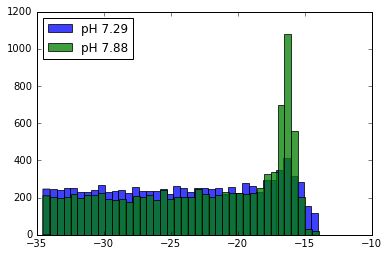

In [7]:
plt.hist(Abl_Bosutinib_pH7p29['DeltaG'][0], 40, alpha=0.75, label='pH 7.29');
plt.hist(Abl_Bosutinib_pH7p88['DeltaG'][0], 40, alpha=0.75, label='pH 7.88');
plt.legend(loc=0);

In [9]:
plt.clf()
Abl_Erlotinib_pH7p29 = pickle.load( open( "./pH-data-Nov16/Abl-pH7p29-Erlotinib-EF_mcmc-2016-11-17 12:09.pickle", "rb" ) )
Abl_Erlotinib_pH7p88 = pickle.load( open( "./pH-data-Nov16/Abl-pH7p88-Erlotinib-EF_mcmc-2016-11-17 12:35.pickle", "rb" ) )

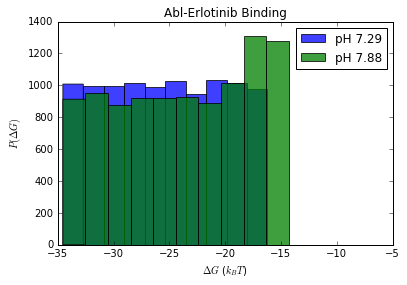

In [10]:
plt.hist(Abl_Erlotinib_pH7p29['DeltaG'][0], 10, alpha=0.75, label='pH 7.29');
plt.hist(Abl_Erlotinib_pH7p88['DeltaG'][0], 10, alpha=0.75, label='pH 7.88');
plt.xlabel('$\Delta G$ ($k_B T$)');
plt.ylabel('$P(\Delta G)$');
plt.title('Abl-Erlotinib Binding')
plt.xlim(-35,-5)
plt.legend(loc=0);

In [11]:
import seaborn as sns

:0: FutureWarning: IPython widgets are experimental and may change in the future.


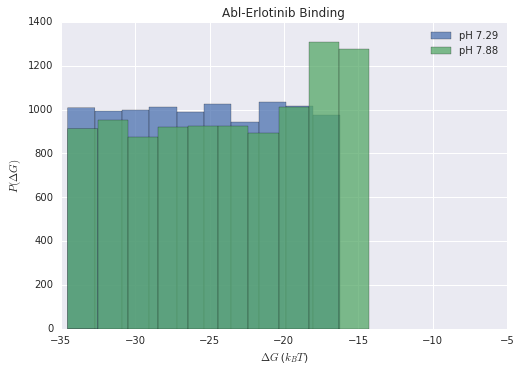

In [12]:
plt.hist(Abl_Erlotinib_pH7p29['DeltaG'][0], 10, alpha=0.75, label='pH 7.29');
plt.hist(Abl_Erlotinib_pH7p88['DeltaG'][0], 10, alpha=0.75, label='pH 7.88');
plt.xlabel('$\Delta G$ ($k_B T$)');
plt.ylabel('$P(\Delta G)$');
plt.title('Abl-Erlotinib Binding')
plt.xlim(-35,-5)
plt.legend(loc=0);

#### Got plot the fluorescence

In [3]:
import string
def reorder2list(data,well):

    sorted_keys = sorted(well.keys(), key=lambda k:well[k])

    reorder_data = []

    for key in sorted_keys:
        try:
            reorder_data.append(data[key])
        except:
            pass

    reorder_data = [r.replace('OVER','70000') for r in reorder_data]

    reorder_data = np.asarray(reorder_data,np.float64)

    return reorder_data

ALPHABET = string.ascii_uppercase

well = dict()
for j in string.ascii_uppercase:
    for i in range(1,25):
        well['%s' %j + '%s' %i] = i

In [4]:
from assaytools import platereader

singlets = {}

def singlet_fromspectra(file_set,ligand_order,wavelength):
    
    for protein in inputs['file_set'].keys():
    
        #concatenate four spectra xmls into one dictionary with all ligand data 
        my_file = []

        data = platereader.read_icontrol_xml(inputs['file_set']['%s'%protein][0])
        for file in inputs['file_set']['%s'%protein]:
            my_file.append(file)
            new_dict = platereader.read_icontrol_xml(file)
            for key in data:
                data[key] = dict(data[key].items()+new_dict[key].items())

        for i in range(0,7,2):
            protein_row = ALPHABET[i]
            buffer_row = ALPHABET[i+1]

            name = "%s-%s-%s%s"%(protein,ligand_order[i/2],protein_row,buffer_row)

            print(name)

            try:
                data_protein = platereader.select_data(data, inputs['section'], protein_row, wavelength = '%s' %wavelength)
                data_buffer = platereader.select_data(data, inputs['section'], buffer_row, wavelength = '%s' %wavelength)
            except:
                continue

            reorder_protein = reorder2list(data_protein,well)
            reorder_buffer = reorder2list(data_buffer,well)
        
            print reorder_protein
            print reorder_buffer
        
            singlets[name] = [reorder_protein, reorder_buffer]
        
    return singlets

Couldn't import dot_parser, loading of dot files will not be possible.


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [5]:
singlets = singlet_fromspectra(inputs['file_set'],inputs['ligand_order'],inputs['wavelength'])

Abl-pH7p29-Bosutinib-AB
[ 32183.  28765.  26214.  25986.  20283.  19097.  16201.   9757.   5623.
   3689.   2723.   2113.]
[ 7440.  6286.  3743.  1629.  1080.   942.   942.   965.  1003.  1075.
   978.  1171.]
Abl-pH7p29-Bosutinib Isomer-CD
[ 38254.  30934.  23436.  18662.  16698.  16751.  11555.   7917.   4870.
   3429.   2408.   1852.]
[ 7875.  6732.  4207.  1392.   967.   952.  1005.   967.   976.  1015.
   928.  1017.]
Abl-pH7p29-Erlotinib-EF
[ 25602.  20842.  17932.  16271.  15704.  12078.   8208.   5259.   3173.
   2531.   2233.   2140.]
[ 9598.  3849.  2272.  1338.  1204.  1087.  1046.  1106.   946.  1045.
  1043.   931.]
Abl-pH7p29-Gefitinib-GH
[ 23991.  18950.  12842.   8122.   4747.   3103.   2803.   2045.   3969.
   2033.   1842.   2057.]
[ 3756.  3077.  3277.  2154.  1333.  1174.  1190.  1272.  1150.  2579.
  2314.  1371.]
Abl-pH7p88-Bosutinib-AB
[ 23655.  27770.  22793.  19641.  17871.  17665.  15266.   8981.   5567.
   3381.   2607.   1726.]
[ 9264.  6420.  4038.  1903.  

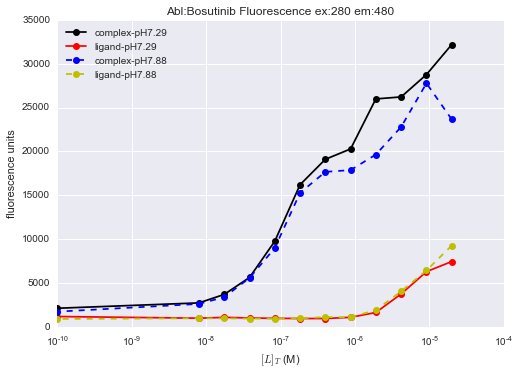

In [6]:
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p29-Bosutinib-AB'][0], 'ko-',label='complex-pH7.29');
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p29-Bosutinib-AB'][1], 'ro-',label='ligand-pH7.29');
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p88-Bosutinib-AB'][0], 'bo--',label='complex-pH7.88');
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p88-Bosutinib-AB'][1], 'yo--',label='ligand-pH7.88');
plt.title('Abl:Bosutinib Fluorescence ex:280 em:480')
plt.xlabel('$[L]_T$ (M)');
plt.ylabel('fluorescence units');
plt.legend(loc=0);

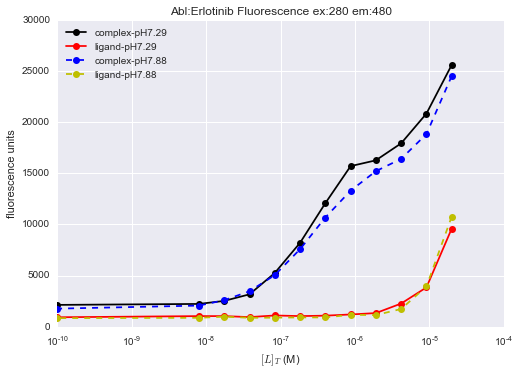

In [7]:
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p29-Erlotinib-EF'][0], 'ko-',label='complex-pH7.29');
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p29-Erlotinib-EF'][1], 'ro-',label='ligand-pH7.29');
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p88-Erlotinib-EF'][0], 'bo--',label='complex-pH7.88');
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p88-Erlotinib-EF'][1], 'yo--',label='ligand-pH7.88');
plt.title('Abl:Erlotinib Fluorescence ex:280 em:480')
plt.xlabel('$[L]_T$ (M)');
plt.ylabel('fluorescence units');
plt.legend(loc=0);

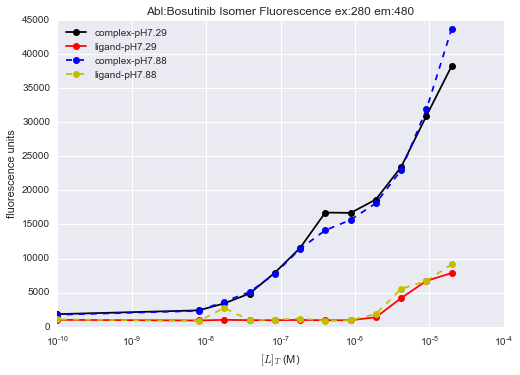

In [9]:
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p29-Bosutinib Isomer-CD'][0], 'ko-',label='complex-pH7.29');
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p29-Bosutinib Isomer-CD'][1], 'ro-',label='ligand-pH7.29');
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p88-Bosutinib Isomer-CD'][0], 'bo--',label='complex-pH7.88');
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p88-Bosutinib Isomer-CD'][1], 'yo--',label='ligand-pH7.88');
plt.title('Abl:Bosutinib Isomer Fluorescence ex:280 em:480')
plt.xlabel('$[L]_T$ (M)');
plt.ylabel('fluorescence units');
plt.legend(loc=0);

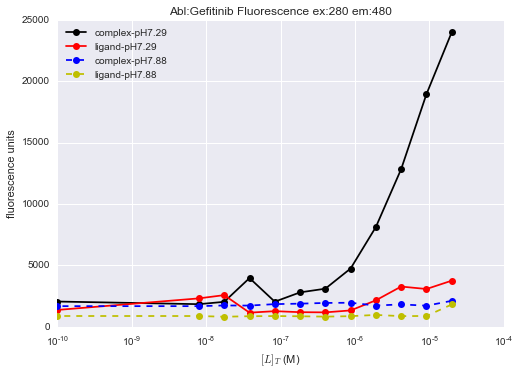

In [8]:
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p29-Gefitinib-GH'][0], 'ko-',label='complex-pH7.29');
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p29-Gefitinib-GH'][1], 'ro-',label='ligand-pH7.29');
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p88-Gefitinib-GH'][0], 'bo--',label='complex-pH7.88');
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p88-Gefitinib-GH'][1], 'yo--',label='ligand-pH7.88');
plt.title('Abl:Gefitinib Fluorescence ex:280 em:480')
plt.xlabel('$[L]_T$ (M)');
plt.ylabel('fluorescence units');
plt.legend(loc=0);

## Can I make this prettier?

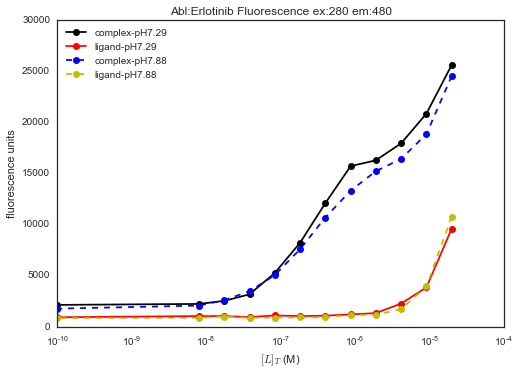

In [13]:
import seaborn as sns
sns.set_style("white")
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p29-Erlotinib-EF'][0], 'ko-',label='complex-pH7.29');
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p29-Erlotinib-EF'][1], 'ro-',label='ligand-pH7.29');
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p88-Erlotinib-EF'][0], 'bo--',label='complex-pH7.88');
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p88-Erlotinib-EF'][1], 'yo--',label='ligand-pH7.88');
plt.title('Abl:Erlotinib Fluorescence ex:280 em:480')
plt.xlabel('$[L]_T$ (M)');
plt.ylabel('fluorescence units');
plt.legend(loc=0);